Found 3895 files belonging to 9 classes.
['Cheetah', 'Hyena', 'Jaguar', 'Tiger', 'bear_png', 'chinkara', 'elephant', 'lion', 'pig']
58889256/58889256 [==============================] - 55s 1us/step


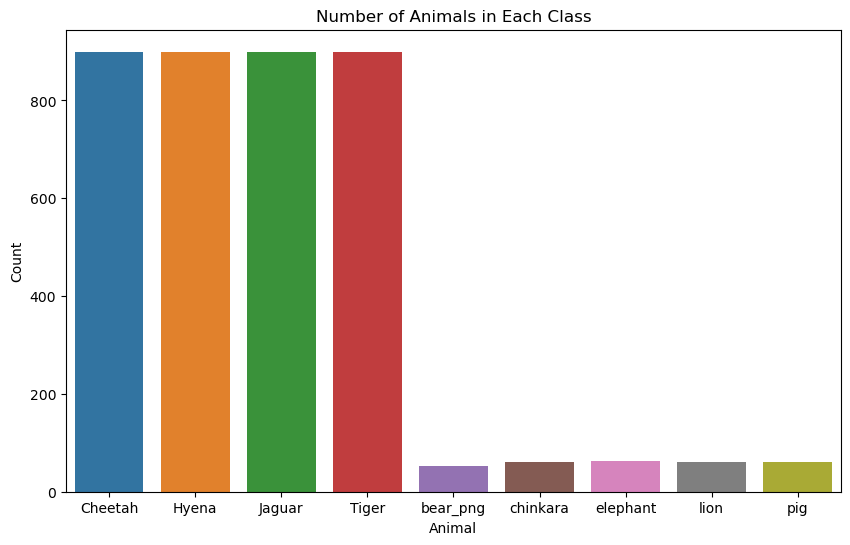

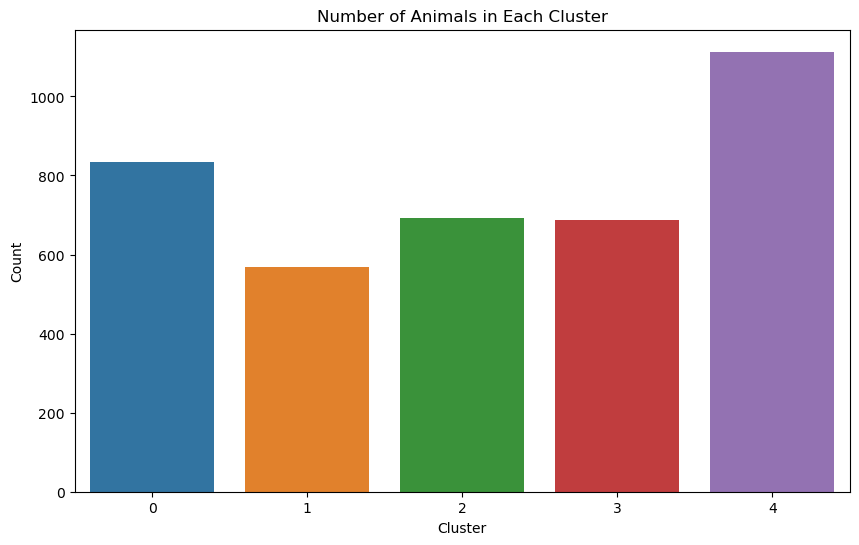

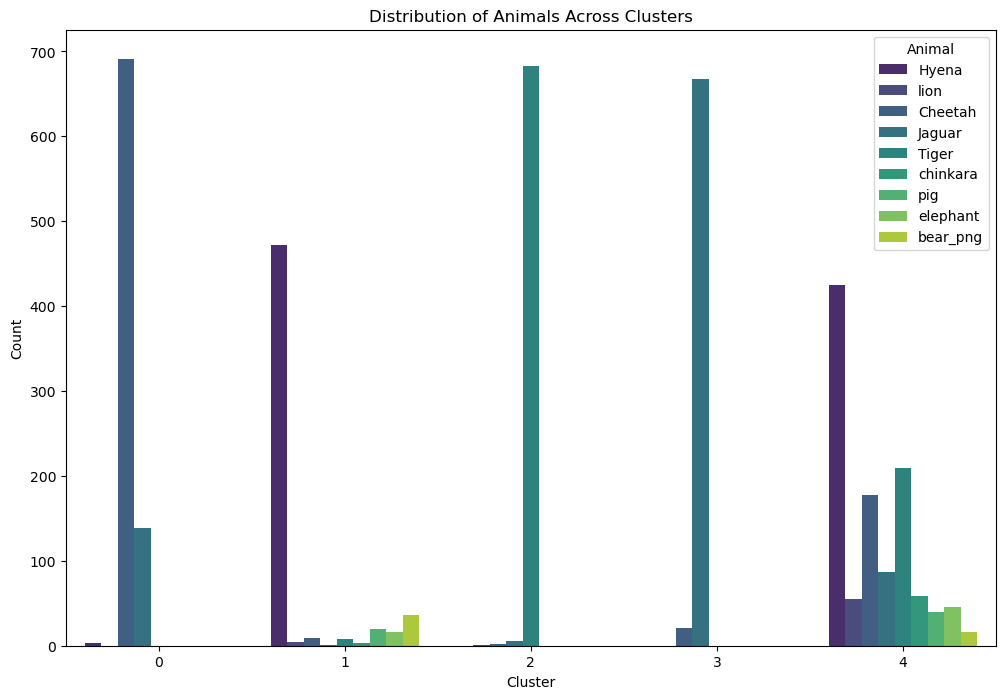

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
dataset_path = "C:\\Users\\ADMIN\\projests\\Wild-Animal-Detection-and-Alert-System-using-YOLO-v8-Model-main\\Animal_test_train_set\\animal"
batch_size = 32
img_height = 180
img_width = 180

train_ds = image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print(class_names)

# Feature extraction using a pre-trained model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(dataset):
    features = []
    labels = []
    for images, label_batch in dataset:
        features_batch = feature_extractor(images)
        features.append(features_batch.numpy().reshape(len(images), -1))
        labels.append(label_batch.numpy())
    return np.concatenate(features), np.concatenate(labels)

features, labels = extract_features(train_ds)

# Perform clustering using K-Means
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster information to labels
df = pd.DataFrame({'label': labels, 'cluster': clusters})
df['class'] = df['label'].map(lambda x: class_names[x])

# Visualizations

# Number of animals in each class
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, order=class_names)
plt.title('Number of Animals in Each Class')
plt.xlabel('Animal')
plt.ylabel('Count')
plt.show()

# Number of animals in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Number of Animals in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Distribution of animals across clusters
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', hue='class', data=df, palette='viridis')
plt.title('Distribution of Animals Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Animal', loc='upper right')
plt.show()
